# Likelihood Ratio Test 

In the lectures, we saw that the likelihood ratio was the most powerful test for a fixed size ($\alpha$) when both $H_{0}$ and $H_{1}$ are specified. 

The likelihood ratio is given by, 

$$
\Lambda = \frac{L(H_{1})}{L(H_{0})}
$$

and we typically take the negative log to define the test statistic. 

$$
\Delta q = -\ln\left(\frac{L(H_{1})}{L(H_{0})}\right)
$$

Let's look at an example where $H_{0}$ is a single Gaussian with $\mu=0,\sigma=1$ and $H_{1}$ is the sum of two Gaussians with $\mu_{1}=\mu+\delta\mu, \mu_{2}=\mu-\delta\mu$ and $\sigma_{1}=\sigma_{2}=\sigma$.

In [1]:
%matplotlib inline

import numpy,pandas,random
from scipy.stats import norm

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})


# null hypothesis is a single source - Gaussian 
mu_H0 = 0
sigma_H0 = 1

# alt hypothesis is 2 sources  - 2 Gaussians 
dmu =  1.05
def mu_1_H1():
  return mu_H0+dmu
def mu_2_H1():
  return mu_H0-dmu


In [2]:
def nlogLR(data):
    LH0    = numpy.log(norm.pdf(data,mu_H0,sigma_H0))
    LH1    = numpy.log(0.5*(norm.pdf(data,mu_1_H1(),sigma_H0)+norm.pdf(data,mu_2_H1(),sigma_H0)))
    
    Lambda = sum(LH1-LH0)
    return -Lambda

First, we let's see what these two hypotheses look like  for our random variable $X$. 

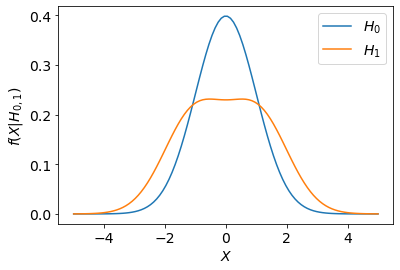

In [3]:
xrange  = numpy.linspace(-5,5,100)
y_H0 = norm.pdf(xrange,mu_H0,sigma_H0)
y_H1 = 0.5*(norm.pdf(xrange,mu_1_H1(),sigma_H0)+norm.pdf(xrange,mu_2_H1(),sigma_H0))

plt.plot(xrange,y_H0,label="$H_{0}$")
plt.plot(xrange,y_H1,label="$H_{1}$")
plt.xlabel("$X$")
plt.ylabel("$f(X|H_{0,1})$")

#xrvs  = mc_2G()
#plt.hist(xrvs,density=True,color='black',histtype='step')
plt.legend()
plt.savefig("lrthtest_hypo.pdf")

We can generate monte carlo simulation to see what the distribution of the test statistic looks like under each hypothesis. Let's assume we have only 50 observations in each simulated dataset. 

In [4]:
n_events = 50

def mc_1G():
    x=norm.rvs(mu_H0,sigma_H0,size=n_events)
    return x

def mc_2G():
    mu_1_H1 = mu_H0+dmu
    mu_2_H1 = mu_H0-dmu
    x1=norm.rvs(mu_1_H1,sigma_H0,size=int(n_events/2))
    x2=norm.rvs(mu_2_H1,sigma_H0,size=int(n_events/2))
    x1 = numpy.concatenate([x1,x2])
    return x1

Let's see what this looks like. We can also calculate the value of $-\ln c_{\alpha}$ that would define our critical region $w$. In the lectures we said we would reject $H_{0}$ if $\Lambda > c_{\alpha}$ which is the same as rejecting $H_{0}$ if $\Delta q < -\ln c_{\alpha}$. 

In [5]:
# Distribution under H0 
n_samples = 1000

lHRH0 = []
for i in range(n_samples):
 xH0 = mc_1G()
 lHRH0.append(nlogLR(xH0))

lHRH1 = []
for i in range(n_samples):
 xH1 = mc_2G()
 lHRH1.append(nlogLR(xH1))

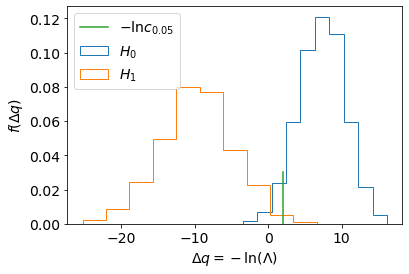

In [6]:
plt.hist(lHRH0,histtype='step',label="$H_{0}$",density=True)
plt.hist(lHRH1,histtype='step',label="$H_{1}$",density=True)
plt.xlabel("$\Delta q = -\ln(\Lambda)$")
plt.ylabel("$f(\Delta q)$")


alpha = 0.05 
dqmax = numpy.quantile(lHRH0,alpha)
plt.plot([dqmax,dqmax],[0,0.03],label="$-\ln c_{%.2f}$"%alpha)
plt.legend()

plt.savefig("lrthtest_hypo_teststat.pdf")

We can already  see that the separation looks very good. Let's calculate the power of the test.

In [7]:
# calculate the power
power_LHR = len(list(filter(lambda x: x< dqmax,lHRH1)))/n_samples
print("Power of LHR = ",power_LHR)

Power of LHR =  0.994


We said that the LHR test should be the most powerful in this scenario. If we compare to the KS test, we should see a smaller power.

In [8]:
# KS test too
# We are passing the sigma as an argument as we'll use it later
def cdf(x):
    return norm.cdf(x,mu_H0,sigma_H0)

def emp_cdf(data,x):
    return float(len(data[data < x]))/len(data)

def D(data):
    diffs = [abs(cdf(x)-emp_cdf(data,x)) for x in xrange]
    return max(diffs)

KSH0 = []
for i in range(n_samples):
 xH0 = mc_1G()
 KSH0.append(D(xH0))

KSH1 = []
for i in range(n_samples):
 xH1 = mc_2G()
 KSH1.append(D(xH1))

0.1781564352856982


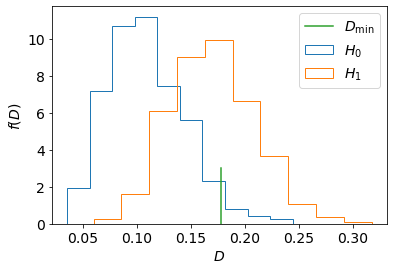

In [9]:
plt.hist(KSH0,histtype='step',label="$H_{0}$",density=True)
plt.hist(KSH1,histtype='step',label="$H_{1}$",density=True)
plt.xlabel("$D$")
plt.ylabel("$f(D)$")
 
Dmin = numpy.quantile(KSH0,1-alpha)
plt.plot([Dmin,Dmin],[0,3],label="$D_{\mathrm{min}}$")
print(Dmin)
plt.legend()

plt.savefig("kstest_hypo_teststat.pdf")

It should be obvious that the power  will be lower, given the much poorer separation in the two hypothesis for the  KS test statistic. 

In [10]:
# calculate the power
power_KS = len(list(filter(lambda x: x> Dmin,KSH1)))/n_samples
print("Power of KS = ",power_KS)

Power of KS =  0.364


Unsuprisingly the KS test is much less powerful in this example. The LRT should be the most powerful test. How would things change if we vary the value of $\delta\mu$? Would you expect the conclusions to change for larger or smaller  values of $\delta\mu$? Try changing the value in this notebook and see how the conclusions change (if at all). 